In [2]:
import seaborn as sns
%matplotlib inline

In [3]:
tips = sns.load_dataset("tips")

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**Uni variant**  
**분포를 보고싶다? displot**  
곡선 없애고 싶으면 kde=False  
구간을 바꾸고 싶으면 bins=30 이런식으로 (default는 15인듯)

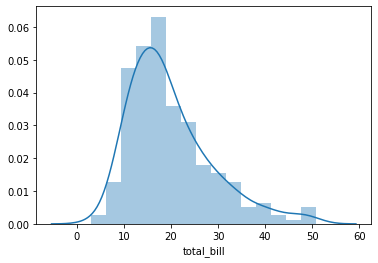

In [10]:
sns.distplot(tips["total_bill"], bins=15)

**Bi variant**  
쉽게 말해서 위에 도수분포표 2개를 합쳐준다.  
kind 안 주면 그냥 점(scatter)으로 찍힌다.hex는 육각형/진함-연함, reg는 regression line도 그려준다.이차원 kde도 가능

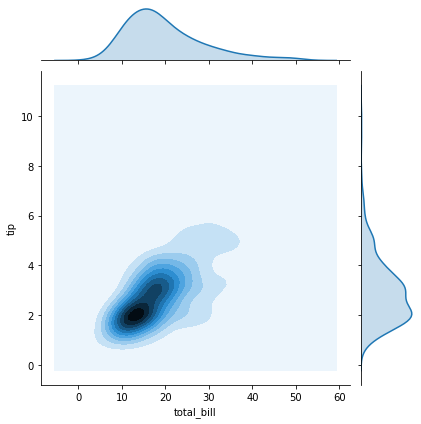

In [16]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="kde")

**Pair plot == joint plot for every combination possible**  
hue에 categorial범주형 column이름(ex.성별-남/녀, 학점-A,B,C,D) 넣어주면 색깔로 구별해줌 

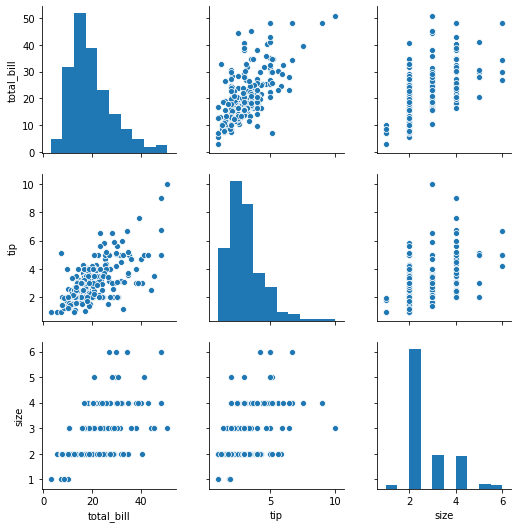

In [25]:
sns.pairplot(tips)
# sns.pairplot(tips, hue="sex", palette="coolwarm")

**Rug plot**  
draw a dash mark for every single point along the distribution line  
KDE Kernel Density Estimation을 rugplot으로 설명할 수 있다.
근데 사실 많이는 안 씀.

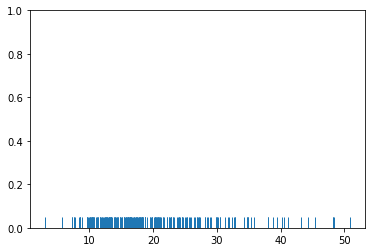

In [20]:
sns.rugplot(tips["total_bill"])

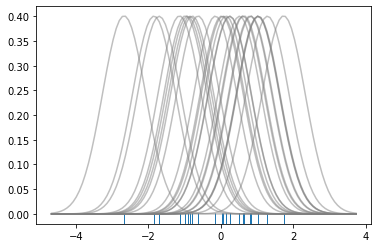

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

dataset = np.random.randn(25)

sns.rugplot(dataset)

x_min=dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**0.2

kernel_list = []

for data_point in dataset:
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    plt.plot(x_axis, kernel, color="gray", alpha=0.5)

정규분포를 다 더하자!

Text(0.5, 0.98, 'Sum of the Basis Functions')

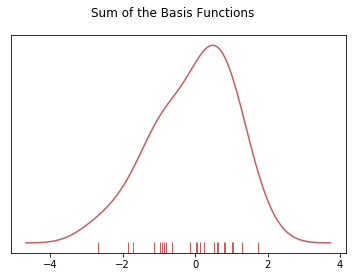

In [30]:
sum_of_kde = np.sum(kernel_list, axis=0)
fig = plt.plot(x_axis, sum_of_kde, color="indianred")
sns.rugplot(dataset, c="indianred")
plt.yticks([])
plt.suptitle("Sum of the Basis Functions")

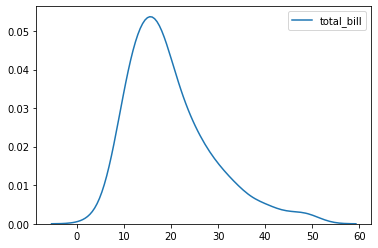

In [31]:
sns.kdeplot(tips["total_bill"])